# Final Project

## WLASL File

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
# import numpy as np

In [2]:
with open("./Dataset/WLASL_v0.3.json") as f:
    wlasl_data = json.load(f)


data = []
for entry in wlasl_data:
    gloss = entry["gloss"]
    for instance in entry["instances"]:
        data.append({
            "video_id": instance["video_id"],
            "gloss": gloss,
            "split": instance["split"],  # train/val/test
            "fps": instance["fps"],
            "frame_start": instance["frame_start"],
            "frame_end": instance["frame_end"],
            "bbox": instance.get("bbox", None),  # Optional
            "signer_id": instance.get("signer_id", None),
            "source": instance["source"],
            "url": instance["url"],
            "variation_id": instance["variation_id"],
        })

df_wlasl = pd.DataFrame(data)

print(f'Total instances: {len(df_wlasl)}')
df_wlasl.head()


Total instances: 21083


,video_id,gloss,split,fps,frame_start,frame_end,bbox,signer_id,source,url,variation_id
0,69241,book,train,25,1,-1,"[385, 37, 885, 720]",118,aslbrick,http://aslbricks.org/New/ASL-Videos/book.mp4,0
1,65225,book,train,25,1,-1,"[190, 25, 489, 370]",90,aslsignbank,https://aslsignbank.haskins.yale.edu/dictionar...,0
2,68011,book,train,25,1,-1,"[262, 1, 652, 480]",110,valencia-asl,https://www.youtube.com/watch?v=0UsjUE-TXns,0
3,68208,book,train,25,1,60,"[123, 19, 516, 358]",113,lillybauer,https://www.youtube.com/watch?v=1QOYOZ3g-aY,0
4,68012,book,train,25,1,-1,"[95, 0, 1180, 720]",109,valencia-asl,https://www.youtube.com/watch?v=aGtIHKEdCds,0


In [3]:
with open("./Dataset/missing.txt", 'r') as f:
    missing_ids = set(f.read().splitlines())

df_wlasl = df_wlasl[~df_wlasl["video_id"].isin(missing_ids)]
print(f"Remaining Filtered Instances: {len(df_wlasl)}")
df_wlasl.head()

Remaining Filtered Instances: 11980


,video_id,gloss,split,fps,frame_start,frame_end,bbox,signer_id,source,url,variation_id
0,69241,book,train,25,1,-1,"[385, 37, 885, 720]",118,aslbrick,http://aslbricks.org/New/ASL-Videos/book.mp4,0
10,07069,book,train,25,1,-1,"[462, 44, 949, 720]",31,signschool,https://signstock.blob.core.windows.net/signsc...,0
17,07068,book,train,25,1,-1,"[234, 17, 524, 414]",36,startasl,https://s3-us-west-1.amazonaws.com/files.start...,0
22,07070,book,train,25,1,-1,"[131, 26, 526, 480]",59,asldeafined,https://media.asldeafined.com/vocabulary/14666...,0
24,07099,book,val,25,1,-1,"[162, 54, 528, 400]",12,aslsearch,http://www.aslsearch.com/signs/videos/book.mp4,0


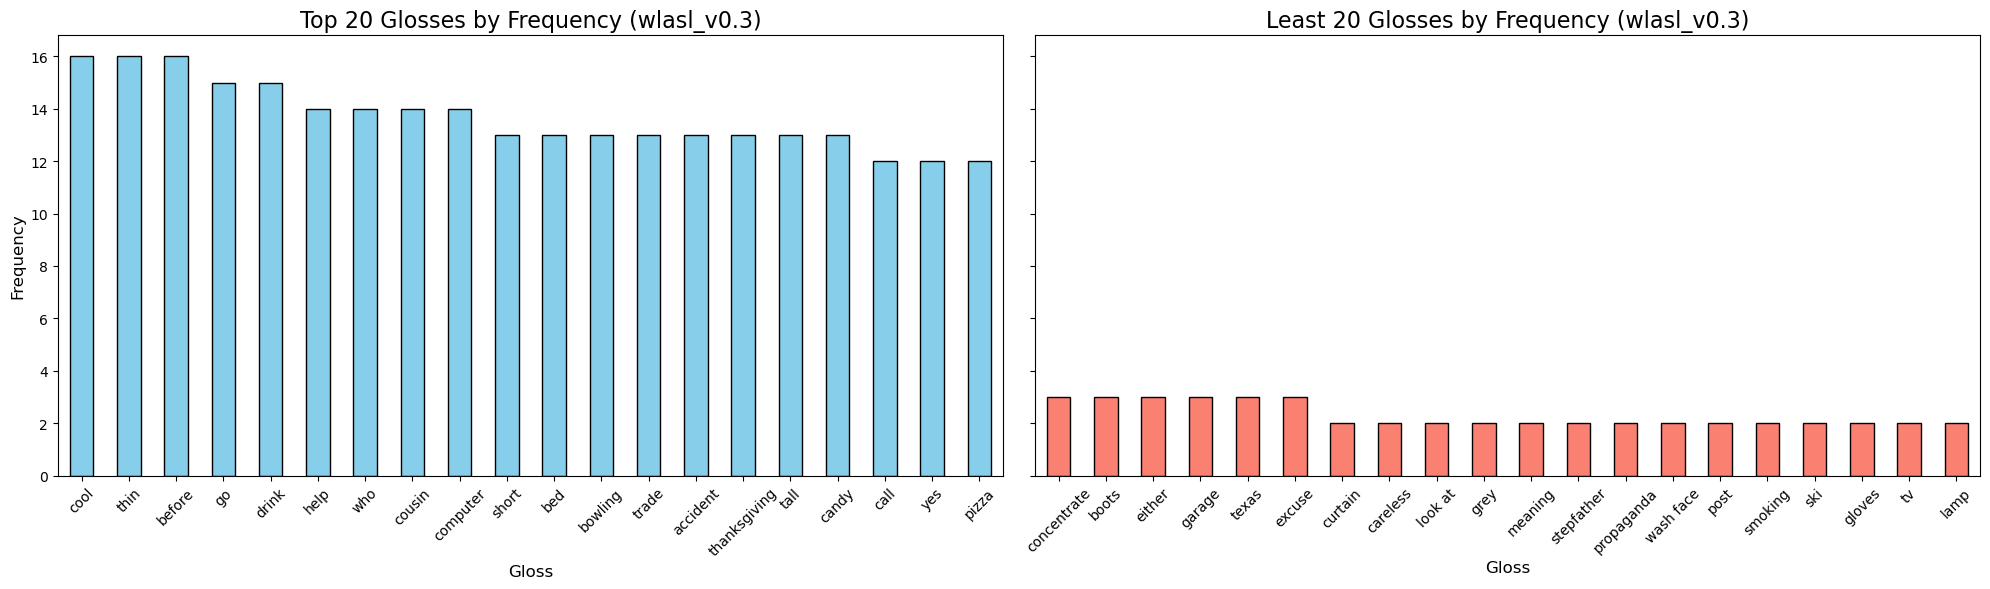

In [4]:
# Compute gloss frequency counts
gloss_counts = df_wlasl["gloss"].value_counts()

# Sort gloss frequencies
gloss_counts_sorted = gloss_counts.sort_values(ascending=False)

# Create subplots for top 20 and least 20 glosses
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)

# Plot top 20 glosses
gloss_counts_sorted.head(20).plot(
    kind="bar", color="skyblue", edgecolor="black", ax=axes[0]
)
axes[0].set_title("Top 20 Glosses by Frequency (wlasl_v0.3)", fontsize=16)
axes[0].set_xlabel("Gloss", fontsize=12)
axes[0].set_ylabel("Frequency", fontsize=12)
axes[0].tick_params(axis="x", rotation=45)

# Plot least 20 glosses
gloss_counts_sorted.tail(20).plot(
    kind="bar", color="salmon", edgecolor="black", ax=axes[1]
)
axes[1].set_title("Least 20 Glosses by Frequency (wlasl_v0.3)", fontsize=16)
axes[1].set_xlabel("Gloss", fontsize=12)
axes[1].tick_params(axis="x", rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


split
train    8313
val      2253
test     1414
Name: count, dtype: int64


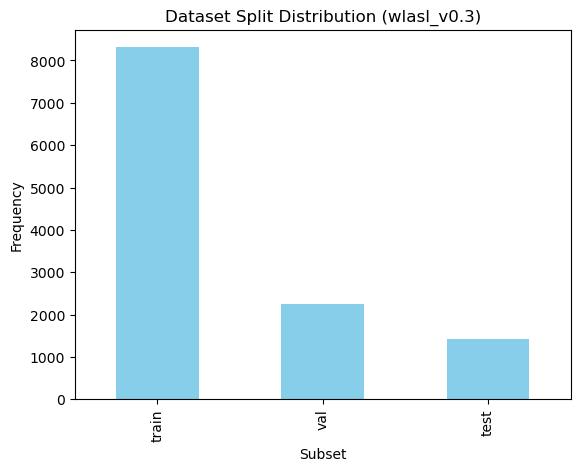

In [5]:
# Split distribution
subset_counts = df_wlasl["split"].value_counts()
print(subset_counts)

# Plot split distribution
subset_counts.plot(kind="bar", color="skyblue")
plt.title("Dataset Split Distribution (wlasl_v0.3)")
plt.xlabel("Subset")
plt.ylabel("Frequency")
plt.show()


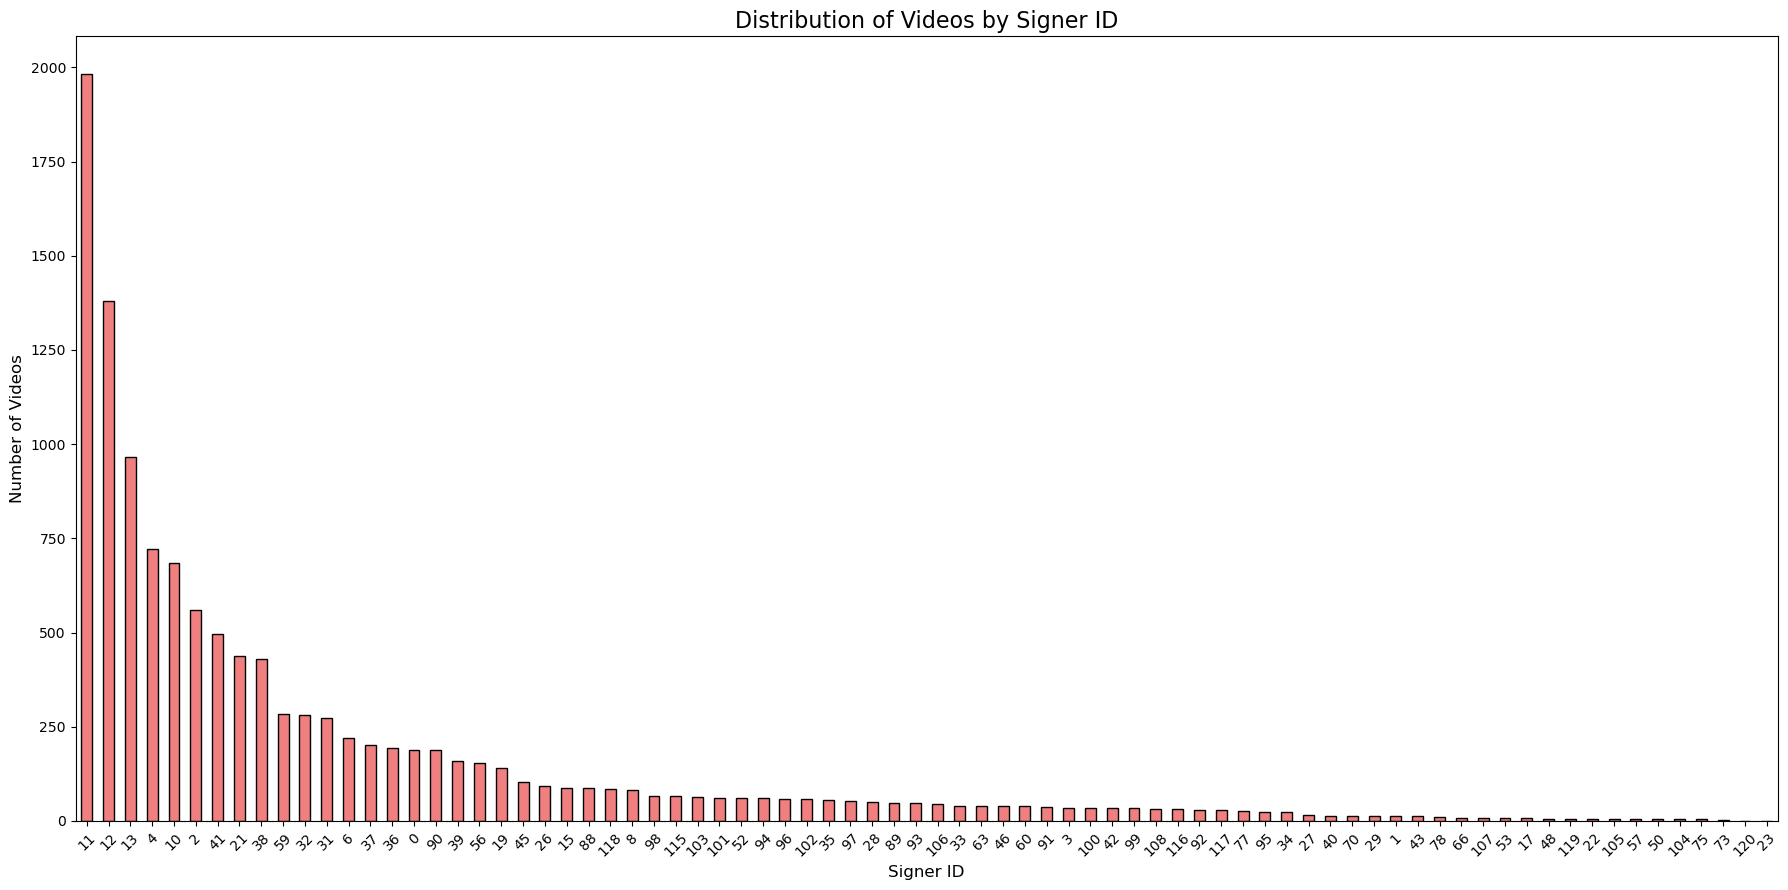

In [6]:
# Count the number of videos per signer
signer_counts = df_wlasl["signer_id"].value_counts()

# Plot the distribution
plt.figure(figsize=(18, 9))
signer_counts.plot(kind="bar", color="lightcoral", edgecolor="black")

# Improve plot aesthetics
plt.title("Distribution of Videos by Signer ID", fontsize=16)
plt.xlabel("Signer ID", fontsize=12)
plt.ylabel("Number of Videos", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

# Show plot
plt.show()

source
signingsavvy     2668
signschool       1968
aslsearch        1875
asldeafined      1833
spreadthesign    1584
aslsignbank      1050
startasl          623
aslbrick          218
elementalasl      161
Name: count, dtype: int64


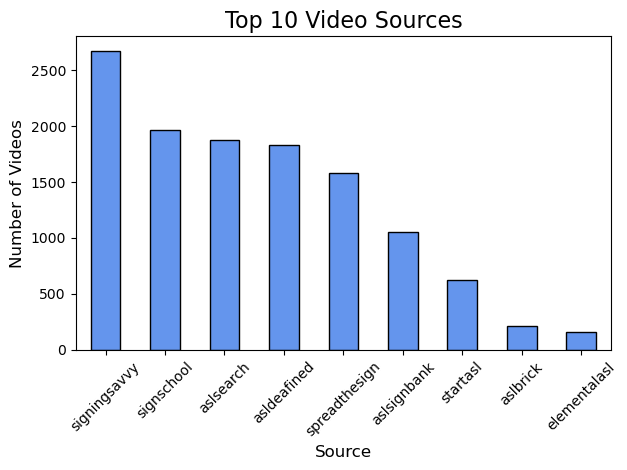

In [7]:
source_counts = df_wlasl["source"].value_counts()
print(source_counts)

# Plot top 10 sources
source_counts.head(10).plot(kind="bar", color="cornflowerblue", edgecolor="black")
plt.title("Top 10 Video Sources", fontsize=16)
plt.xlabel("Source", fontsize=12)
plt.ylabel("Number of Videos", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [8]:
# Filter out entries with bounding boxes
df_with_bbox = df_wlasl[df_wlasl["bbox"].notnull()]

# Calculate bounding box dimensions
df_with_bbox["bbox_width"] = df_with_bbox["bbox"].apply(lambda bbox: bbox[2] - bbox[0])
df_with_bbox["bbox_height"] = df_with_bbox["bbox"].apply(lambda bbox: bbox[3] - bbox[1])

# Calculate average bounding box width and height
avg_width = df_with_bbox["bbox_width"].mean()
avg_height = df_with_bbox["bbox_height"].mean()

print(f"Average Bounding Box Width: {avg_width}")
print(f"Average Bounding Box Height: {avg_height}")


Average Bounding Box Width: 403.5108514190317
Average Bounding Box Height: 430.0003338898164


count    11980.000000
mean         0.922376
std          0.155050
min          0.532039
25%          0.812746
50%          0.906250
75%          1.026188
max          1.858333
Name: bbox_aspect_ratio, dtype: float64


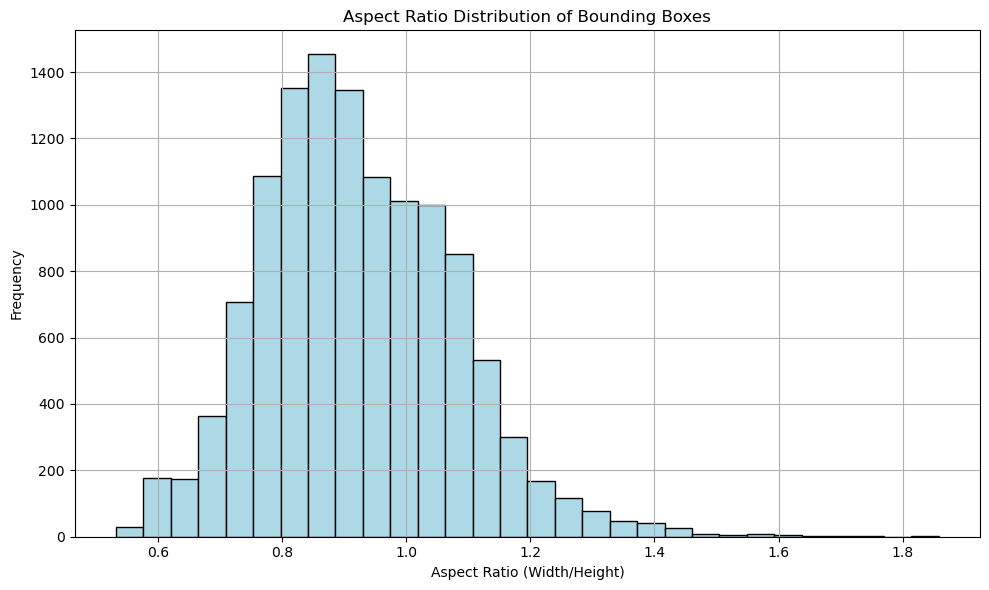

In [9]:
# Calculate aspect ratio (Width/Height) for bounding boxes
df_with_bbox["bbox_aspect_ratio"] = df_with_bbox["bbox_width"] / df_with_bbox["bbox_height"]

# Describe aspect ratio statistics
print(df_with_bbox["bbox_aspect_ratio"].describe())

# Plot aspect ratio distribution
df_with_bbox["bbox_aspect_ratio"].hist(bins=30, color="lightblue", edgecolor="black", figsize=(10, 6))
plt.title("Aspect Ratio Distribution of Bounding Boxes")
plt.xlabel("Aspect Ratio (Width/Height)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


               avg_bbox_width  avg_bbox_height  avg_aspect_ratio  avg_fps  \
source                                                                      
signingsavvy       151.897301       178.363568          0.850866     25.0   
signschool         945.582825       953.199695          0.990877     25.0   
aslsearch          350.464533       350.048533          1.003603     25.0   
asldeafined        448.300055       470.159847          0.954153     25.0   
spreadthesign      211.368687       231.737374          0.911500     25.0   
aslsignbank        320.957143       350.879048          0.915581     25.0   
startasl           398.563403       581.048154          0.702612     25.0   
aslbrick           649.931193       717.055046          0.909062     25.0   
elementalasl       169.149068       171.944099          0.982077     25.0   

               video_count  
source                      
signingsavvy          2668  
signschool            1968  
aslsearch             1875  
asldeaf

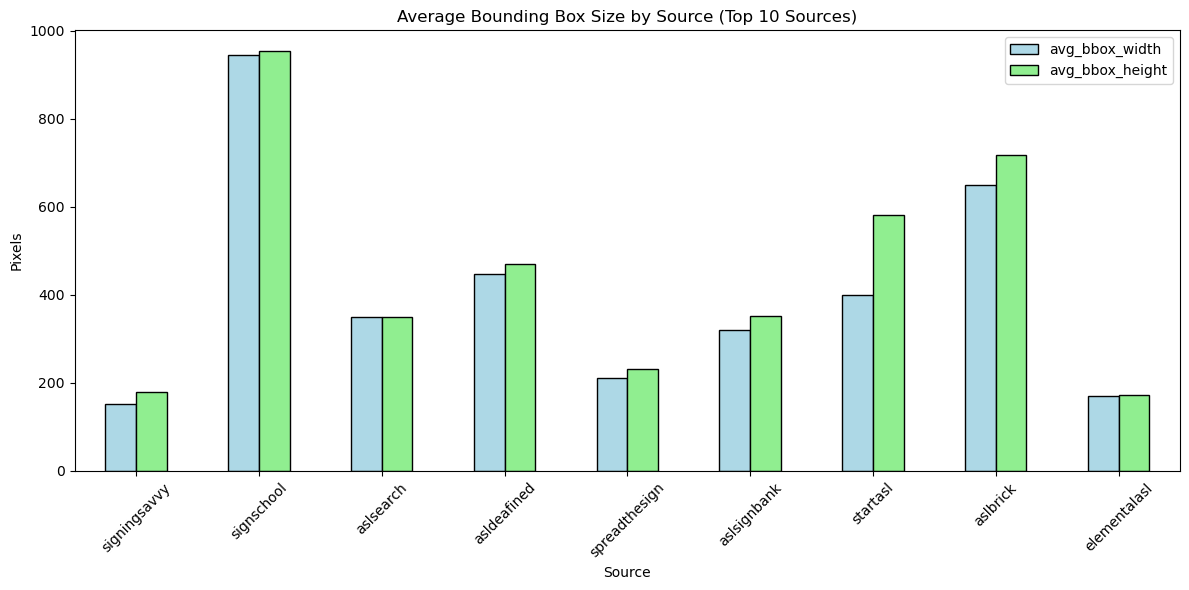

In [10]:
# Group by source to calculate video quality metrics
video_quality = df_with_bbox.groupby("source").agg(
    avg_bbox_width=("bbox_width", "mean"),
    avg_bbox_height=("bbox_height", "mean"),
    avg_aspect_ratio=("bbox_aspect_ratio", "mean"),
    avg_fps=("fps", "mean"),
    video_count=("source", "count")
).sort_values(by="video_count", ascending=False)

# Display video quality by source
print(video_quality)


# Plot average bounding box width and height for top 10 sources
video_quality[["avg_bbox_width", "avg_bbox_height"]].head(10).plot(
    kind="bar", figsize=(12, 6), edgecolor="black", color=["lightblue", "lightgreen"]
)
plt.title("Average Bounding Box Size by Source (Top 10 Sources)")
plt.xlabel("Source")
plt.ylabel("Pixels")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
# Count rows where frame_end == -1
count_frame_end_negative_one = (df_wlasl["frame_end"] == -1).sum()

print(f"Number of instances with frame_end = -1: {count_frame_end_negative_one}")

# Count rows where frame_end == -1
count_frame_start__one = (df_wlasl["frame_start"] == 1).sum()
print(f"Number of instances with frame_start = 1: {count_frame_start__one}")

# # Filter rows where frame_start is not 1
# non_starting_frames = df_wlasl[df_wlasl["frame_start"] != 1]

# # Display results
# print(f"Number of instances with frame_start != 1: {len(non_starting_frames)}")
# print(non_starting_frames)



Number of instances with frame_end = -1: 11980
Number of instances with frame_start = 1: 11978


In [12]:
# Count rows where frame_end == -1
var_id_is_not_zero = (df_wlasl["variation_id"] != 0).sum()

print(f"Number of instances with variation id is not 0: {var_id_is_not_zero }")

variation_counts = df_wlasl.groupby("gloss")["variation_id"].nunique()
print(variation_counts.head(10))  # Show first 10 glosses

most_varied_gloss = variation_counts.idxmax()
print(f"Gloss with most variations: {most_varied_gloss}")
####

Number of instances with variation id is not 0: 644
gloss
a             1
a lot         1
abdomen       1
able          1
about         1
above         1
accent        1
accept        1
accident      2
accomplish    1
Name: variation_id, dtype: int64
Gloss with most variations: computer


## NSLT Files

for Action 
* 0 is label Index
* 1 is frame start
* 2 is frame end

This is from consistency of other language dataset like PHOENIX-2014 and is an assumption was was made

In [13]:
# Paths to NSLT files
nslt_files = ["./Dataset/nslt_100.json", "./Dataset/nslt_300.json", "./Dataset/nslt_1000.json", "./Dataset/nslt_2000.json"]

# Load and combine NSLT files
data = []
for file in nslt_files:
    with open(file, "r") as f:
        nslt_data = json.load(f)
        for video_id, info in nslt_data.items():
            data.append({
                "video_id": video_id,
                "subset": info["subset"],
                "label_index": info["action"][0],
                "frame_start": info["action"][1],
                "frame_end": info["action"][2],
            })

# Create a DataFrame
df_nslt = pd.DataFrame(data)

# Display basic info
print(f"Total Entries: {len(df_nslt)}")
df_nslt.head()


Total Entries: 41425


,video_id,subset,label_index,frame_start,frame_end
0,05237,train,77,1,55
1,69422,val,27,1,51
2,10899,train,82,1,48
3,10898,val,82,1,39
4,10893,train,82,1,50


In [14]:
df_nslt = df_nslt[~df_nslt["video_id"].isin(missing_ids)]
print(f"Remaining Filtered Instances: {len(df_nslt)}")
df_nslt.head()

Remaining Filtered Instances: 22904


,video_id,subset,label_index,frame_start,frame_end
1,69422,val,27,1,51
3,10898,val,82,1,39
4,10893,train,82,1,50
5,10892,train,82,1,203
7,10895,train,82,1,108


In [15]:
# Get video IDs from WLASL and NSLT
wlasl_ids = set(df_wlasl["video_id"])
nslt_ids = set(df_nslt["video_id"])

# Find common and unique video IDs
common_ids = wlasl_ids & nslt_ids
unique_to_nslt = nslt_ids - wlasl_ids
unique_to_wlasl = wlasl_ids - nslt_ids

# Print stats about the video ID sets
print(f"Common video IDs: {len(common_ids)}")
print(f"Unique to NSLT: {len(unique_to_nslt)}")
print(f"Unique to WLASL: {len(unique_to_wlasl)}")

# Filter NSLT to keep only rows with common video IDs
df_nslt_filtered = df_nslt[df_nslt["video_id"].isin(common_ids)]

# Remove duplicates to ensure one entry per video ID
df_nslt_filtered_unique = df_nslt_filtered.drop_duplicates(subset="video_id")

# Verify the final number of entries
print(f"Number of NSLT entries after filtering and deduplication: {len(df_nslt_filtered_unique)}")

df_nslt_filtered_unique.head()


Common video IDs: 11980
Unique to NSLT: 12
Unique to WLASL: 0
Number of NSLT entries after filtering and deduplication: 11980


,video_id,subset,label_index,frame_start,frame_end
1,69422,val,27,1,51
3,10898,val,82,1,39
4,10893,train,82,1,50
5,10892,train,82,1,203
7,10895,train,82,1,108


Average video length in frames: 60.85


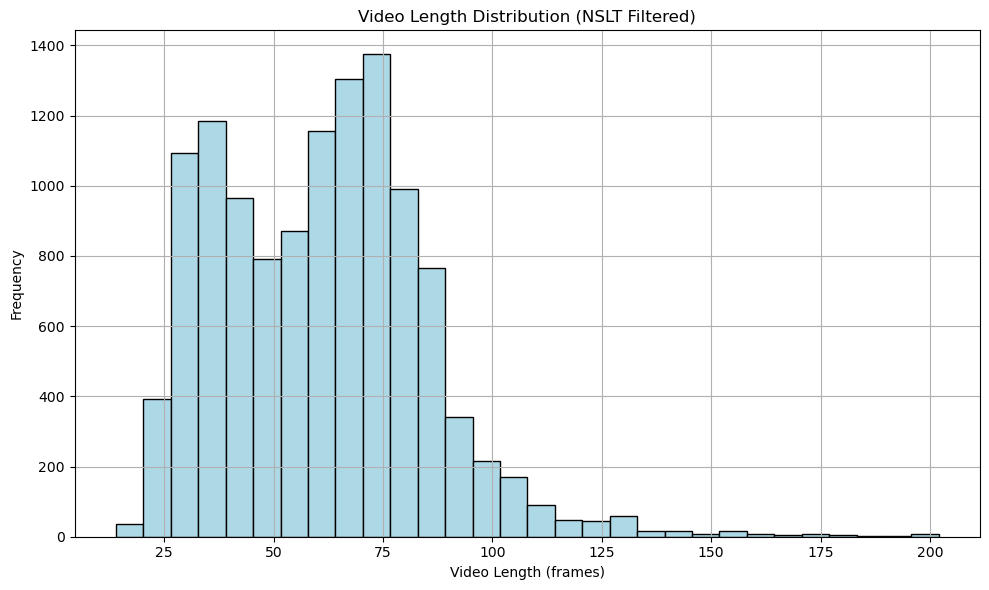

In [16]:
# Create a copy of the filtered DataFrame to avoid SettingWithCopyWarning
df_nslt_filtered_unique = df_nslt_filtered_unique.copy()

# Calculate video length in frames
df_nslt_filtered_unique["video_length"] = (
    df_nslt_filtered_unique["frame_end"] - df_nslt_filtered_unique["frame_start"]
)

# Calculate the average video length
average_length = df_nslt_filtered_unique["video_length"].mean()

# Display the result
print(f"Average video length in frames: {average_length:.2f}")

plt.figure(figsize=(10, 6))
df_nslt_filtered_unique["video_length"].hist(bins=30, color="lightblue", edgecolor="black")
plt.title("Video Length Distribution (NSLT Filtered)")
plt.xlabel("Video Length (frames)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


## Preprocessing

### **Updated Preprocessing Plan**

---

#### **1. Use Videos Directly**
- Utilize the full videos without extracting individual frames.
- Use `frame_start` and `frame_end` metadata only to determine the duration of each video.

---

#### **2. Pose Keypoint Extraction**
- Extract pose keypoints for each frame of the video using tools such as:
  - **MediaPipe**: Lightweight, real-time pose estimation.
  - **OpenPose**: Robust and accurate pose estimation for more detailed keypoints.
- Normalize the extracted keypoints to a range like `[0, 1]`.
- Save pose keypoints in structured formats (e.g., JSON files, one per video).

---

#### **3. Optical Flow Extraction**
- Process the videos to compute optical flow, capturing motion dynamics between frames.
- Save optical flow data for each video to enhance temporal modeling.

---

#### **4. Feature Scaling**
- Normalize all features for consistent input to the model:
  - Scale pixel intensities to `[0, 1]`.
  - Normalize bounding box coordinates and pose keypoints to `[0, 1]`.

---

#### **5. Label Encoding**
- Map `gloss` labels to numeric indices using the `wlasl_class_list.txt` for consistency.
- Save the mapping to ensure alignment across preprocessing and modeling steps.

---

#### **6. Temporal Padding/Truncation**
- Standardize video lengths for consistent input:
  - Pad shorter videos with zeros or repeat frames.
  - Truncate longer videos to a fixed duration (e.g., 8 seconds).


### Pose Keypoint Extraction

In [38]:
import cv2
import mediapipe as mp
import os
from multiprocessing import Pool, Value, Lock
from tqdm import tqdm
import time
import numpy as np


In [18]:

mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

video_dir = "./dataset/videos"
output_dir = "./dataset/pose_keypoints"
os.makedirs(output_dir, exist_ok=True)

def extract_pose_keypoints(video_id, video_path):
    # Open all the videos
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error opening video: {video_path}")
        return
    
    keypoints_list = []
    frame_number = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Convert to RGB for MediaPipe
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Extract pose keypoints from the frame
        results = pose.process(frame_rgb)

        if results.pose_landmarks:
            # Ext4ract (x, y, z) for all landmarks
            keypoints = [
                {"x": lm.x, "y": lm.y, "z": lm.z, "visibility": lm.visibility}
                for lm in results.pose_landmarks.landmark
            ]

            keypoints_list.append({"frame": frame_number, "keypoints": keypoints})
        
        frame_number += 1
    
    cap.release()

    # Save keypoints to a JSON file
    output_path = os.path.join(output_dir, f"{video_id}.json")
    with open(output_path, "w") as f:
        json.dump(keypoints_list, f, indent=4)
    
    print(f"Pose keypoints extracted for video {video_id}")  


In [ ]:
# # Function to process a single video
# def process_video(video_id, video_path):
#     try:
#         # Check if video exists
#         if not os.path.exists(video_path):
#             print(f"Video not found: {video_path}")
#             return
        
#         # Perform pose keypoint extraction
#         extract_pose_keypoints(video_id, video_path)
        
#         # Indicate completion for the current video
#         print(f"Finished processing video: {video_id}")
#     except Exception as e:
#         print(f"Error processing video {video_id}: {e}")

# # Sequential processing
# def process_videos_sequential(df_wlasl, video_dir):
#     for _, row in df_wlasl.iterrows():
#         video_id = row["video_id"]
#         video_path = os.path.join(video_dir, f"{video_id}.mp4")
#         process_video(video_id, video_path)

# # Main script
# if __name__ == "__main__":
#     video_dir = "./dataset/videos"  # Path to your video files
#     print("Starting sequential video processing...")  # Indicate start
    
#     process_videos_sequential(df_wlasl, video_dir)  # Process videos sequentially
    
#     print("All videos processed.")  # Indicate end


Starting sequential video processing...
Pose keypoints extracted for video 69241
Finished processing video: 69241
Pose keypoints extracted for video 07069
Finished processing video: 07069
Pose keypoints extracted for video 07068
Finished processing video: 07068
Pose keypoints extracted for video 07070
Finished processing video: 07070
Pose keypoints extracted for video 07099
Finished processing video: 07099
Pose keypoints extracted for video 07074
Finished processing video: 07074
Pose keypoints extracted for video 69302
Finished processing video: 69302
Pose keypoints extracted for video 65539
Finished processing video: 65539
Pose keypoints extracted for video 17710
Finished processing video: 17710
Pose keypoints extracted for video 17733
Finished processing video: 17733
Pose keypoints extracted for video 65540
Finished processing video: 65540
Pose keypoints extracted for video 17734
Finished processing video: 17734
Pose keypoints extracted for video 17711
Finished processing video: 1771

In [ ]:
# also know as temoral edges
POSE_CONNECTIONS = [
    # Arms
    (11, 13), (13, 15),       # Left shoulder → elbow → wrist
    (12, 14), (14, 16),       # Right shoulder → elbow → wrist

    # Torso
    (11, 12),                 # Left shoulder ↔ Right shoulder
    (11, 23), (12, 24),       # Shoulders → hips
    (23, 25), (25, 27),       # Left hip → knee → ankle
    (24, 26), (26, 28),       # Right hip → knee → ankle
]



# Visualization function
def visualize_pose(video_path, keypoints_path, output_path=None):
    # Load keypoints from JSON
    with open(keypoints_path, "r") as f:
        pose_keypoints = json.load(f)

    # Open the video file
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error: Unable to open video {video_path}")
        return

    # Video writer for saving the output
    writer = None
    if output_path:
        fourcc = cv2.VideoWriter_fourcc(*"mp4v")
        fps = int(cap.get(cv2.CAP_PROP_FPS))
        width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        writer = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    frame_idx = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Draw keypoints and connections for the current frame
        if frame_idx < len(pose_keypoints):
            keypoints = pose_keypoints[frame_idx]["keypoints"]

            # Draw keypoints
            for i, kp in enumerate(keypoints):
                x, y = int(kp["x"] * frame.shape[1]), int(kp["y"] * frame.shape[0])
                visibility = kp.get("visibility", 1.0)
                if visibility > 0.5:  # Only draw visible keypoints
                    cv2.circle(frame, (x, y), 5, (0, 255, 0), -1)

            # Draw connections
            for connection in POSE_CONNECTIONS:
                start, end = connection
                if start < len(keypoints) and end < len(keypoints):
                    x1, y1 = int(keypoints[start]["x"] * frame.shape[1]), int(keypoints[start]["y"] * frame.shape[0])
                    x2, y2 = int(keypoints[end]["x"] * frame.shape[1]), int(keypoints[end]["y"] * frame.shape[0])
                    cv2.line(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)

        # Display or save the frame
        if writer:
            writer.write(frame)
        else:
            cv2.imshow("Pose Visualization", frame)

        frame_idx += 1

        # Press 'q' to exit the visualization
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    cap.release()
    if writer:
        writer.release()
    cv2.destroyAllWindows()



# Paths to video and pose keypoints
video_dir = "./dataset/videos/"
keypoints_dir = "./dataset/pose_keypoints/"
video_id = "00335"

video_path = os.path.join(video_dir, f"{video_id}.mp4")
keypoints_path = os.path.join(keypoints_dir, f"{video_id}.json")
output_video_path = "./output_visualized.mp4"  # Optional: Save the visualization

# Run visualization
visualize_pose(video_path, keypoints_path, output_video_path)



#### Keypoint Normalization

In [48]:
def normalize_keypoints(pose_keypoints, bbox):
    """
    Normalize keypoints based on the bounding box dimensions.
    """
    x_min, y_min, x_max, y_max = bbox
    bbox_width = x_max - x_min
    bbox_height = y_max - y_min

    normalized_keypoints = []
    for kp in pose_keypoints:
        x = kp["x"]
        y = kp["y"]
        z = kp["z"]
        visibility = kp.get("visibility", 1.0)

        if visibility > 0.5:  # Normalize only visible keypoints
            x_normalized = (x - x_min) / bbox_width
            y_normalized = (y - y_min) / bbox_height
            z_normalized = z  # Optional: Normalize z (e.g., by its range)
        else:
            x_normalized, y_normalized, z_normalized = 0.0, 0.0, 0.0  # Default for invisible keypoints

        normalized_keypoints.append([x_normalized, y_normalized, z_normalized])
    return normalized_keypoints



In [49]:
from tqdm import tqdm
# Paths
pose_keypoints_dir = "./dataset/pose_keypoints"  # Directory containing pose keypoints JSON files
output_dir = "./dataset/normalized_keypoints"  # Directory to save normalized keypoints
os.makedirs(output_dir, exist_ok=True)

# Normalize keypoints for all videos
for _, row in tqdm(df_wlasl.iterrows(), total=len(df_wlasl)):
    video_id = row["video_id"]
    bbox = row["bbox"]  # Bounding box for the video

    # Load pose keypoints for this video
    keypoints_path = os.path.join(pose_keypoints_dir, f"{video_id}.json")
    if not os.path.exists(keypoints_path):
        print(f"Keypoints file not found for video: {video_id}")
        continue

    with open(keypoints_path, "r") as f:
        pose_keypoints = json.load(f)

    # Normalize keypoints for each frame
    normalized_data = []
    for frame_data in pose_keypoints:
        frame_keypoints = frame_data["keypoints"]
        normalized_keypoints = normalize_keypoints(frame_keypoints, bbox)
        normalized_data.append({
            "frame": frame_data["frame"],
            "keypoints": normalized_keypoints
        })

    # Save normalized keypoints to a new JSON file
    output_path = os.path.join(output_dir, f"{video_id}_normalized.json")
    with open(output_path, "w") as f:
        json.dump(normalized_data, f)

print("Normalization completed for all videos!")

100%|██████████| 11980/11980 [04:24<00:00, 45.25it/s]

Normalization completed for all videos!


#### Graph Construction

In [59]:
import os
import json
import numpy as np
from tqdm import tqdm

# Directories
pose_keypoints_dir = "./dataset/normalized_keypoints"  # Directory containing normalized keypoints JSON files
output_dir = "./dataset/graph_data"  # Directory to save graph data
os.makedirs(output_dir, exist_ok=True)

# Spatial edges for MediaPipe keypoints
SPATIAL_EDGES = [
    # Arms
    (11, 13), (13, 15),  # Left shoulder → elbow → wrist
    (12, 14), (14, 16),  # Right shoulder → elbow → wrist

    # Torso
    (11, 12),            # Left shoulder ↔ Right shoulder
    (11, 23), (12, 24),  # Shoulders → hips
    (23, 25), (25, 27),  # Left hip → knee → ankle
    (24, 26), (26, 28),  # Right hip → knee → ankle
]

def define_temporal_edges(num_frames, num_nodes):
    """
    Define temporal edges for a sequence of frames.
    """
    temporal_edges = []
    for t in range(num_frames - 1):  # Iterate through frames
        for node in range(num_nodes):  # Iterate through nodes
            temporal_edges.append((t * num_nodes + node, (t + 1) * num_nodes + node))
    return temporal_edges

def construct_edges(num_frames, num_nodes):
    """
    Construct combined spatial and temporal edges for the graph.
    """
    # Spatial edges repeated for each frame
    spatial_edges = []
    for t in range(num_frames):
        for edge in SPATIAL_EDGES:
            spatial_edges.append((t * num_nodes + edge[0], t * num_nodes + edge[1]))

    # Temporal edges
    temporal_edges = define_temporal_edges(num_frames, num_nodes)

    # Combine spatial and temporal edges
    return spatial_edges + temporal_edges

def construct_adjacency_matrix(edges, num_total_nodes):
    """
    Construct adjacency matrix from edge list.
    """
    adjacency_matrix = np.zeros((num_total_nodes, num_total_nodes))

    for i, j in edges:
        adjacency_matrix[i, j] = 1
        adjacency_matrix[j, i] = 1  # Undirected graph

    return adjacency_matrix


In [60]:

def process_videos(pose_keypoints_dir, output_dir):
    """
    Process all videos to create adjacency matrices with spatial and temporal edges,
    and save features.

    Args:
        pose_keypoints_dir (str): Directory containing normalized keypoints JSON files.
        output_dir (str): Directory to save graph data.
    """
    for file_name in tqdm(os.listdir(pose_keypoints_dir)):
        if not file_name.endswith("_normalized.json"):
            continue

        video_id = file_name.replace("_normalized.json", "")
        input_path = os.path.join(pose_keypoints_dir, file_name)

        # Load normalized keypoints
        with open(input_path, "r") as f:
            normalized_keypoints = json.load(f)

        # Extract pose keypoints and frame count
        pose_keypoints = [frame["keypoints"] for frame in normalized_keypoints]
        num_frames = len(pose_keypoints)
        num_nodes = len(pose_keypoints[0])  # Number of keypoints per frame
        num_total_nodes = num_frames * num_nodes

        try:
            # Construct edges and adjacency matrix
            edges = construct_edges(num_frames, num_nodes)
            adjacency_matrix = construct_adjacency_matrix(edges, num_total_nodes)

            # Flatten pose keypoints into graph features
            graph_features = np.array(pose_keypoints).reshape(num_frames, num_nodes, -1)

            # Save adjacency matrix and graph features
            np.save(os.path.join(output_dir, f"{video_id}_adjacency.npy"), adjacency_matrix)
            np.save(os.path.join(output_dir, f"{video_id}_features.npy"), graph_features)

        except Exception as e:
            print(f"Error processing video {video_id}: {e}")

    print("Graph construction completed for all videos!")

# Run the function
process_videos(pose_keypoints_dir, output_dir)


  0%|          | 0/11980 [00:00<?, ?it/s]

100%|██████████| 11980/11980 [17:35<00:00, 11.35it/s]

Graph construction completed for all videos!


In [52]:
# Directories
pose_keypoints_dir = "./dataset/normalized_keypoints"  # Directory containing normalized keypoints JSON files
output_dir = "./dataset/graph_data"  # Directory to save graph data
os.makedirs(output_dir, exist_ok=True)

def construct_graph(pose_keypoints, num_frames):
    """
    Construct a graph with spatial and temporal connections.

    Args:
        pose_keypoints (list): List of normalized keypoints for all frames.
                               Shape: [num_frames, num_nodes, num_features].
        num_frames (int): Number of frames in the video.

    Returns:
        adjacency_matrix (numpy.ndarray): Adjacency matrix for spatial and temporal connections.
        graph_features (numpy.ndarray): Pose keypoints in [num_frames, num_nodes, num_features].
    """
    num_nodes = len(pose_keypoints[0])  # Number of keypoints
    num_features = len(pose_keypoints[0][0])  # Features per keypoint (e.g., x, y, z)

    # Validate POSE_CONNECTIONS
    max_index = max(max(connection) for connection in POSE_CONNECTIONS)
    if max_index >= num_nodes:
        raise ValueError(
            f"POSE_CONNECTIONS references node index {max_index}, "
            f"but only {num_nodes} nodes are present in the keypoints."
        )

    # Create adjacency matrix
    adjacency_matrix = np.zeros((num_nodes, num_nodes))

    # Add spatial connections
    for connection in POSE_CONNECTIONS:
        i, j = connection
        adjacency_matrix[i, j] = 1
        adjacency_matrix[j, i] = 1  # Undirected graph

    # Flatten pose keypoints into graph features
    graph_features = np.array(pose_keypoints).reshape(num_frames, num_nodes, num_features)

    return adjacency_matrix, graph_features



In [53]:
for file_name in tqdm(os.listdir(pose_keypoints_dir)):
    if not file_name.endswith("_normalized.json"):
        continue

    video_id = file_name.replace("_normalized.json", "")
    input_path = os.path.join(pose_keypoints_dir, file_name)

    # Load normalized keypoints
    with open(input_path, "r") as f:
        normalized_keypoints = json.load(f)

    # Extract pose keypoints and frame count
    pose_keypoints = [frame["keypoints"] for frame in normalized_keypoints]
    num_frames = len(pose_keypoints)

    try:
        # Construct graph
        adjacency_matrix, graph_features = construct_graph(pose_keypoints, num_frames)

        # Save adjacency matrix and graph features
        np.save(os.path.join(output_dir, f"{video_id}_adjacency.npy"), adjacency_matrix)
        np.save(os.path.join(output_dir, f"{video_id}_features.npy"), graph_features)

    except ValueError as e:
        print(f"Error processing video {video_id}: {e}")

print("Graph construction completed for all videos!")


  0%|          | 0/11980 [00:00<?, ?it/s]

100%|██████████| 11980/11980 [02:41<00:00, 74.16it/s]

Graph construction completed for all videos!


#### Temporal & Spatial edges with adjacency matrix construct

In [54]:
def define_temporal_edges(num_frames, num_nodes):
    """
    Define temporal edges for a sequence of frames.

    Args:
        num_frames (int): Number of frames in the video.
        num_nodes (int): Number of keypoints per frame.

    Returns:
        list: Temporal edges as a list of tuples (node_t1, node_t2).
    """
    temporal_edges = []
    for t in range(num_frames - 1):  # Iterate through frames
        for node in range(num_nodes):  # Iterate through nodes
            temporal_edges.append((t * num_nodes + node, (t + 1) * num_nodes + node))
    return temporal_edges


In [55]:
# Spatial edges for MediaPipe
SPATIAL_EDGES = [
    # Arms
    (11, 13), (13, 15),  # Left shoulder → elbow → wrist
    (12, 14), (14, 16),  # Right shoulder → elbow → wrist

    # Torso
    (11, 12),            # Left shoulder ↔ Right shoulder
    (11, 23), (12, 24),  # Shoulders → hips
    (23, 25), (25, 27),  # Left hip → knee → ankle
    (24, 26), (26, 28),  # Right hip → knee → ankle
]

def define_temporal_edges(num_frames, num_nodes):
    """
    Define temporal edges for a sequence of frames.
    """
    temporal_edges = []
    for t in range(num_frames - 1):  # Iterate through frames
        for node in range(num_nodes):  # Iterate through nodes
            temporal_edges.append((t * num_nodes + node, (t + 1) * num_nodes + node))
    return temporal_edges

def construct_edges(num_frames, num_nodes):
    """
    Construct combined spatial and temporal edges for the graph.
    """
    # Spatial edges repeated for each frame
    spatial_edges = []
    for t in range(num_frames):
        for edge in SPATIAL_EDGES:
            spatial_edges.append((t * num_nodes + edge[0], t * num_nodes + edge[1]))

    # Temporal edges
    temporal_edges = define_temporal_edges(num_frames, num_nodes)

    # Combine spatial and temporal edges
    return spatial_edges + temporal_edges

def construct_adjacency_matrix(edges, num_frames, num_nodes):
    """
    Construct adjacency matrix from edge list.
    """
    num_total_nodes = num_frames * num_nodes
    adjacency_matrix = np.zeros((num_total_nodes, num_total_nodes))

    for edge in edges:
        i, j = edge
        adjacency_matrix[i, j] = 1
        adjacency_matrix[j, i] = 1  # Undirected graph

    return adjacency_matrix

In [ ]:
# Directories
pose_keypoints_dir = "./dataset/normalized_keypoints"  # Directory containing normalized keypoints
output_dir = "./dataset/graph_data"  # Directory to save graph data
os.makedirs(output_dir, exist_ok=True)

# Process all videos
for file_name in tqdm(os.listdir(pose_keypoints_dir)):
    if not file_name.endswith("_normalized.json"):
        continue

    video_id = file_name.replace("_normalized.json", "")
    input_path = os.path.join(pose_keypoints_dir, file_name)

    # Load normalized keypoints
    with open(input_path, "r") as f:
        normalized_keypoints = json.load(f)

    # Extract pose keypoints and frame count
    pose_keypoints = [frame["keypoints"] for frame in normalized_keypoints]
    num_frames = len(pose_keypoints)
    num_nodes = len(pose_keypoints[0])  # Number of keypoints per frame

    try:
        # Construct edges and adjacency matrix
        edges = construct_edges(num_frames, num_nodes)
        adjacency_matrix = construct_adjacency_matrix(edges, num_frames, num_nodes)

        # Save adjacency matrix
        np.save(os.path.join(output_dir, f"{video_id}_adjacency.npy"), adjacency_matrix)

    except Exception as e:
        print(f"Error processing video {video_id}: {e}")

print("Graph construction completed for all videos!")